In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import feature_column
from tensorflow.keras import layers
import pickle
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [4]:
train_df = pd.read_excel(r'C:\Users\Mrinal\Desktop\Oil Leak.xlsx')
test_df = pd.read_excel(r'C:\Users\Mrinal\Desktop\Oil Leak test.xlsx')

In [8]:
feature_columns = []
pressure = tf.feature_column.numeric_column("pressure")
feature_columns.append(pressure)
flow = tf.feature_column.numeric_column("flow")
feature_columns.append(flow)
feature_layer = layers.DenseFeatures(feature_columns)
feature_layer(dict(train_df))

<tf.Tensor: shape=(681, 2), dtype=float32, numpy=
array([[23.967821,  5.      ],
       [23.956722,  5.      ],
       [23.929676,  5.      ],
       ...,
       [11.023411, 11.      ],
       [11.005994, 11.      ],
       [11.00345 , 11.      ]], dtype=float32)>

In [9]:
def create_model(my_learning_rate, feature_layer, my_metrics):
  model = tf.keras.models.Sequential()
  model.add(feature_layer)
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)
  return model        


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  return epochs, hist  
print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


In [10]:
 def plot_curve(epochs, hist, list_of_metrics):
  
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


Epoch 1/30
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
57/57 [==============================] - 0s 2ms/step - loss: 1.2858 - accuracy: 0.6270
Epoch 2/30
57/57 [==============================] - 0s 3ms/step - loss: 0.3017 - accuracy: 0.8811
Epoch 3/30
57/57 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9236
Epoch 4/30
57/57 [==============================] - 0s 3ms/step - loss: 0.1689 - accuracy: 0.9413
Epoch 5/30
57/57 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9457
Epoch 6/30
57/57 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9486
Epoch 7/30
57/57 [==============================] - 0s 3ms/step - loss: 0.1207 - accuracy: 0.9457
Epoch 8/30
57/57 [==============================] - 0s 3ms/step - loss: 0.1137 - accuracy: 0.9530
Epoch 9/30
57/57 [==============================] - 0s 3ms/step - loss: 0.1104 - accuracy: 0.9486
Epoch 10

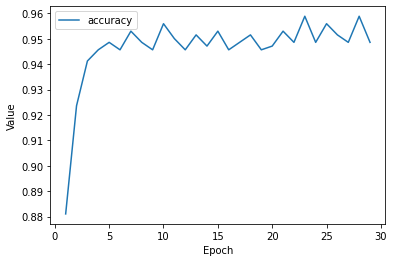

In [13]:
learning_rate = 0.01
epochs = 30
batch_size = 12
label_name = "Leakage"
classification_threshold = 0.35
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy',
                                    threshold=classification_threshold),
]

my_model = create_model(learning_rate, feature_layer, METRICS)
epochs, hist = train_model(my_model, train_df, epochs,
                           label_name, batch_size)
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

In [14]:
features = {name:np.array(value) for name, value in test_df.items()}
print(test_df[['pressure', 'flow','Leakage']])
label = np.array(features.pop(label_name))
predicted_values = my_model.predict(features)
predicted_values =(predicted_values>0.5).astype(float)

print("Post Prediction Leakage Values")
print("         ")
print("Pressure    Flow          Predicted")
print("value       value          value")
print("--------------------------------------")
n = len(test_df.axes[0])
for i in range(n):
    print ("%5.0f  " "%.2f %15.0f" % (test_df["pressure"][0 + i],
                                   test_df["flow"][0 + i],
                                   predicted_values[i][0] ))


    pressure  flow  Leakage
0          5  23.8      nan
1          5  21.0      nan
2          6  20.8      nan
3          6  18.9      nan
4          6  18.7      nan
..       ...   ...      ...
7          8  17.4      nan
8          8  17.3      nan
9          9  12.8      nan
10         9  12.6      nan
11        10  11.7      nan

[12 rows x 3 columns]
Consider rewriting this model with the Functional API.
Post Prediction Leakage Values
         
Pressure    Flow          Predicted
value       value          value
--------------------------------------
    5  23.81               1
    5  20.96               1
    6  20.79               1
    6  18.89               1
    6  18.71               1
    7  17.69               1
    7  17.60               1
    8  17.44               0
    8  17.31               0
    9  12.82               0
    9  12.65               0
   10  11.69               0
